### Os dados utilizados neste trabalho foram fornecidos por [Sajid - dbdmobile](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)
#### Rótulos de Conteúdo (Traduzidos do Inglês):

- `anime_id`: Identificação única para cada anime.

- `Name`: O nome do anime em seu idioma original.

- `English name`: O nome em inglês do anime.

- `Other name`: Nome nativo ou título do anime (pode estar em japonês, chinês ou coreano).

- `Score`: A pontuação ou classificação atribuída ao anime.

- `Genres`: Os gêneros do anime, separados por vírgulas.

- `Synopsis`: Uma breve descrição ou resumo do enredo do anime.

- `Type`: O tipo de anime (por exemplo, série de TV, filme, OVA, etc.).

- `Episodes`: O número de episódios no anime.

- `Aired`: As datas em que o anime foi ao ar.

- `Premiered`: A temporada e o ano em que o anime estreou.

- `Status`: O status do anime (por exemplo, Finalizado, Atualmente em exibição, etc.).

- `Producers`: As empresas de produção ou produtores do anime.

- `Licensors`: Os licenciadores do anime (por exemplo, plataformas de streaming).

- `Studios`: Os estúdios de animação que trabalharam no anime.

- `Source`: O material de origem do anime (por exemplo, mangá, light novel, original).

- `Duration`: A duração de cada episódio.

- `Rating`: A classificação etária do anime.

- `Rank`: A posição do anime com base em popularidade ou outros critérios.

- `Popularity`: A classificação de popularidade do anime.

- `Favorites`: O número de vezes que o anime foi marcado como favorito pelos usuários.

- `Scored By`: O número de usuários que deram uma pontuação ao anime.

- `Members`: O número de membros que adicionaram o anime à sua lista na plataforma.

- `Image URL`: A URL da imagem ou poster do anime.


### Importando as bibliotecas e fazendo as configurações

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# Usando uma paleta predefinida
sns.set_palette("pastel6")
warnings.filterwarnings('ignore')
%matplotlib inline

### Extraindo os dados e começando a análise

In [262]:
path = "../data/anime-dataset-2023.csv"
df = pd.read_csv(path)
df.sample(2)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
18610,45142,Mohuan Xian Zong (Movie),Magic Wonderland (Movie),魔幻仙踪,UNKNOWN,"Adventure, Fantasy",A baby princess named Ocean is sent away from ...,Movie,1.0,"May 30, 2014",...,UNKNOWN,Unknown,1 hr 29 min,PG - Children,18231.0,22122,0,UNKNOWN,60,https://cdn.myanimelist.net/images/anime/1213/...
20569,47961,Bai Bian Xiao Jia: Xiao Jia Xiang Qian Chong,UNKNOWN,百变小加之小加向前冲,UNKNOWN,UNKNOWN,No description available for this anime.,ONA,52.0,Not available,...,UNKNOWN,Original,3 min per ep,PG - Children,14739.0,23581,0,UNKNOWN,42,https://cdn.myanimelist.net/images/anime/1101/...


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

#### Removendo as colunas sem utilidades para a análise

Colunas que representam duração, premiação, imagem e etc...

In [264]:
col_drop = ['Image URL', 'Members', 'Duration', 'Source', 'Licensors', 'Producers', 'Status', 'Premiered', 'Synopsis', 'Other name', 'English name', 'Aired'] 
df = df.drop(columns=col_drop)

#### Excluindo os valores nulos

1. Trocando os valores `'UNKNOWN'` para o `np.nan` do Numpy 

2. Iremos remover os valores nulos, pois, estão espalhados em diversas features que representam opiniões ou são algo categórico

In [265]:
cols = df.columns

for c in cols:
    df[c] = df[c].replace('UNKNOWN', np.nan)

df = df.dropna()
df.sample(3)

,anime_id,Name,Score,Genres,Type,Episodes,Studios,Rating,Rank,Popularity,Favorites,Scored By
23377,53367,Shen Lan Qi Yu Wushuang Zhu 2nd Season,7.0,"Action, Fantasy",ONA,15.0,CG Year,PG-13 - Teens 13 or older,3983.0,15468,4,122.0
408,435,Magic Knight Rayearth,7.47,"Adventure, Comedy, Drama, Fantasy",TV,20.0,Tokyo Movie Shinsha,PG-13 - Teens 13 or older,1816.0,2492,547,27916.0
5377,8479,Hetalia World Series,7.45,Comedy,ONA,48.0,Studio Deen,PG-13 - Teens 13 or older,1888.0,1833,826,56569.0


- Podemos converter de antemão as features para seus respectivos tipos

In [266]:
df['Score'] = df['Score'].astype('float') 
df['Scored By'] = df['Scored By'].astype('float') 
df['Episodes'] = df['Episodes'].astype('float')
df['Rank'] = df['Rank'].astype('float')
df['Genres'] = df['Genres'].astype('str')
df['Type'] = df['Type'].astype('str')

- Checando novamente as informações da colunas

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9992 entries, 0 to 24590
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    9992 non-null   int64  
 1   Name        9992 non-null   object 
 2   Score       9992 non-null   float64
 3   Genres      9992 non-null   object 
 4   Type        9992 non-null   object 
 5   Episodes    9992 non-null   float64
 6   Studios     9992 non-null   object 
 7   Rating      9992 non-null   object 
 8   Rank        9992 non-null   float64
 9   Popularity  9992 non-null   int64  
 10  Favorites   9992 non-null   int64  
 11  Scored By   9992 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1014.8+ KB


- Vamos ter uma visão geral sobre as colunas númericas (arredondando os valores para duas casas decimais)

In [268]:
df.describe().round(2)

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By
count,9992.00,9992.00,9992.00,9992.00,9992.00,9992.00,9992.00
mean,19858.76,6.71,14.26,5466.36,6152.94,1041.05,45894.30
std,16883.37,0.84,42.37,3380.29,4177.80,6528.39,143487.49
min,1.00,1.85,1.00,1.00,1.00,0.00,103.00
25%,3294.25,6.15,1.00,2568.75,2560.75,3.00,973.50
50%,14903.00,6.72,6.00,5232.00,5481.00,20.00,4797.00
75%,35557.50,7.29,13.00,8130.00,9452.25,170.00,27510.25
max,55355.00,9.10,1818.00,12701.00,19191.00,217606.00,2660903.00


### Analisando as features individualmente

##### Genre

In [269]:
df["Genres"].value_counts() 

Genres
Comedy                                                       921
Action, Sci-Fi                                               341
Action, Adventure, Fantasy                                   295
Comedy, Slice of Life                                        285
Action                                                       265
                                                            ... 
Adventure, Fantasy, Suspense                                   1
Award Winning, Comedy, Drama, Slice of Life, Supernatural      1
Adventure, Comedy, Fantasy, Supernatural, Ecchi                1
Adventure, Fantasy, Girls Love, Mystery, Ecchi                 1
Fantasy, Sports                                                1
Name: count, Length: 823, dtype: int64

- Resumo geral da feature `"Genres"`, os diversos gêneros estão sendo tratados como uma única string, portando, temos que realizar algumas operações antes de nos aprofundar nisso

In [270]:
# Dicionário para armazenar a contagem de cada gênero
genero_contagem = {}

# Iterar sobre cada linha da coluna 'Genres'
for generos in df['Genres']:
    # Dividir a string de gêneros em uma lista separada por vírgulas
    generos_lista = generos.split(',')
    # Iterar sobre cada gênero na lista
    for genero in generos_lista:
        # Remover espaços em branco extras e converter para minúsculas
        genero = genero.strip().lower()
        genero_contagem[genero] = genero_contagem.get(genero, 0) + 1

# Ordena em ordem decrescente
sorted_genres = sorted(genero_contagem.items(), key=lambda x: x[1], reverse=True)

# Imprime todos os gêneros e sua frequência
for i, (genero, contagem) in enumerate(sorted_genres, start=1):
    print(f'{i} - {genero}: {contagem}')


1 - comedy: 4263
2 - action: 3519
3 - fantasy: 2655
4 - adventure: 2334
5 - sci-fi: 2175
6 - drama: 1903
7 - romance: 1616
8 - supernatural: 1063
9 - slice of life: 930
10 - ecchi: 725
11 - mystery: 687
12 - sports: 489
13 - horror: 333
14 - award winning: 170
15 - suspense: 159
16 - boys love: 98
17 - gourmet: 89
18 - girls love: 83
19 - avant garde: 73



- Plotando os gêneros para melhor visualização dos dados limpos

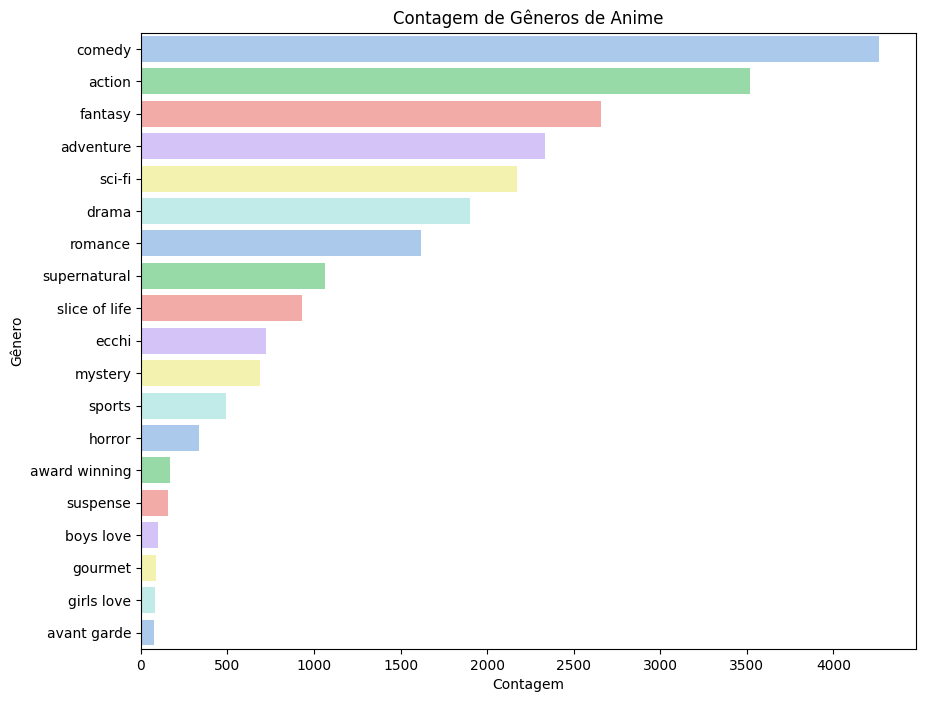

In [271]:
df_genres = pd.DataFrame(sorted_genres, columns=['Genero', 'Contagem'])

cores = sns.color_palette("pastel6", len(df_genres))

plt.figure(figsize=(10, 8))
sns.barplot(x='Contagem', y='Genero', data=df_genres, palette=cores)
plt.title('Contagem de Gêneros de Anime')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.show();

##### Score

Vamos ter uma visão geral sobre `Score`

In [272]:
df['Score'].describe().round(3)

count    9992.000
mean        6.708
std         0.837
min         1.850
25%         6.150
50%         6.720
75%         7.290
max         9.100
Name: Score, dtype: float64

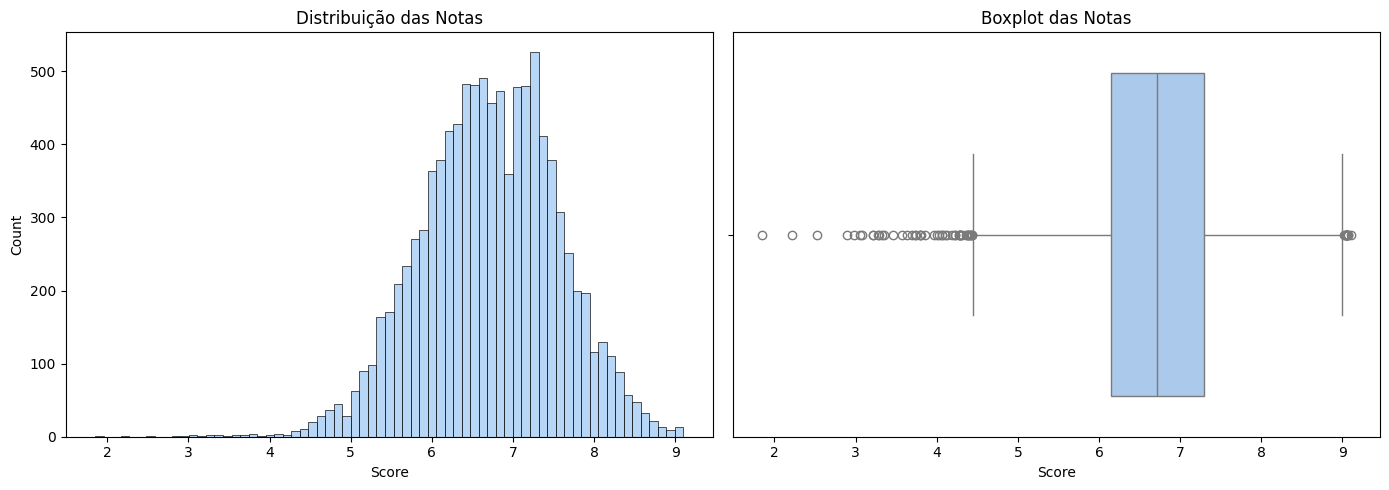

In [273]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de Barras - lado esquerdo
sns.histplot(data=df, x='Score', ax=axes[0])  
axes[0].set_title('Distribuição das Notas')

# Gráfico Boxplot - lado direito
sns.boxplot(data=df, x='Score', ax=axes[1], )  
axes[1].set_title('Boxplot das Notas')

# Epaçamentos gráficos
plt.tight_layout()
plt.show()


- Temos uma distribuição que se consentra perto dos 6 a 7 

- No Boxpot podemos ver que exitem bastente outliers para notas menores de 4 e para isso teremos que conferir se existe um motivo

- Vamos ver quantas notas abaixo de 4 temos em nossos dados

In [274]:
low_score = df[df['Score'] < 4]['anime_id'].count()
print(f"Total de animes com um score baixo: {low_score}")

Total de animes com um score baixo: 24


In [275]:
df[df['Score'] < 4][['Score', 'Favorites', 'Popularity', 'Scored By', 'Rank']].describe().round(2)

,Score,Favorites,Popularity,Scored By,Rank
count,24.00,24.00,24.00,24.00,24.00
mean,3.31,52.21,6740.79,12609.25,12662.29
std,0.53,88.73,2905.08,22933.55,24.92
min,1.85,1.00,1206.00,598.00,12616.00
25%,3.08,5.75,4848.75,2059.00,12641.25
50%,3.34,16.50,7370.00,2672.00,12667.00
75%,3.74,42.25,8415.25,9533.75,12681.75
max,3.97,295.00,12363.00,101649.00,12701.00


- Podemos ver que todas as carcacterísticas desses animes são ruins, portando, esses outliers fazem sentido

- Dessa maneira, não é necessário realizar nenhuma operação

#### Type

- Vamos explorar os tipos existentes de animações orientais

- Se houver alguma inconsistência lidaremos com ela

In [276]:
print(df['Type'].unique())

['TV' 'Movie' 'OVA' 'Special' 'ONA']


Temos 6 variedades: 

1. **TV (Televisão)**: Refere-se aos animes produzidos para transmissão na televisão. Eles geralmente têm episódios mais longos e seguem um formato de série.

2. **Movie (Filme)**: Animes feitos para exibição nos cinemas. Eles são muitas vezes produções mais elaboradas e têm uma duração maior do que os episódios de TV.

3. **OVA (Original Video Animation)**: São animes lançados diretamente para o mercado de home video, sem serem exibidos na TV. Eles podem ser histórias complementares, spin-offs ou adaptações de mangás.

4. **Special (Especial)**: Esses são episódios únicos ou especiais de animes que não se encaixam necessariamente na sequência principal da série. Eles podem ser lançados como bônus com DVDs, eventos especiais ou ocasiões comemorativas.

5. **ONA (Original Net Animation)**: Animes produzidos para distribuição online. Eles são lançados em plataformas de streaming ou websites, em vez de serem exibidos na televisão.

6. **Music (Música)**: Neste contexto, refere-se a vídeos musicais baseados em animes, muitas vezes apresentando músicas tema da série ou personagens cantando. Eles podem ser lançados como parte de um DVD ou separadamente para promover a série.


##### Ver as distribuição dos tipos 

In [277]:
counts = df['Type'].value_counts()
print(counts)

Type
TV         4099
OVA        1583
Special    1583
Movie      1561
ONA        1166
Name: count, dtype: int64


- Plotando em gráfico de barras para ficar mais fácil de visualizar

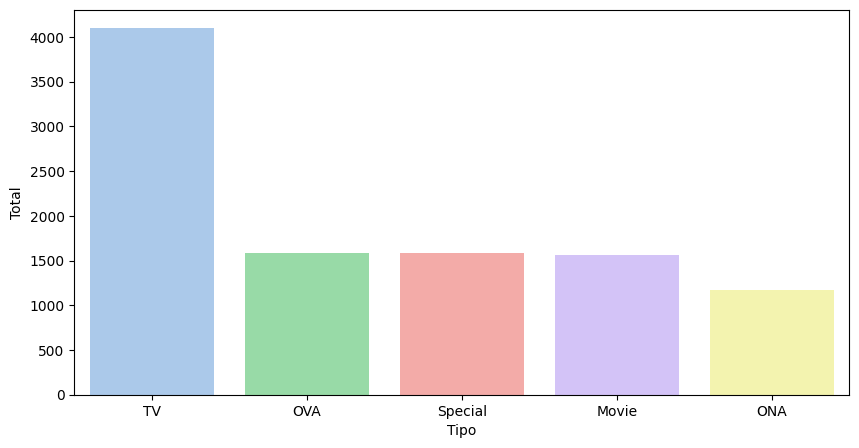

In [278]:
plt.figure(figsize=(10, 5))
cores = sns.color_palette("pastel6", len(counts))
sns.barplot(x=counts.index, y=counts.values, palette=cores)

# Adicionando rótulos aos eixos
plt.xlabel('Tipo')
plt.ylabel('Total')
plt.show();